In [1]:
import numpy as np
from sklearn.datasets import load_iris
import sys
if "../" not in sys.path:
  sys.path.append("../")

from unsupervised.pca import PCA

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

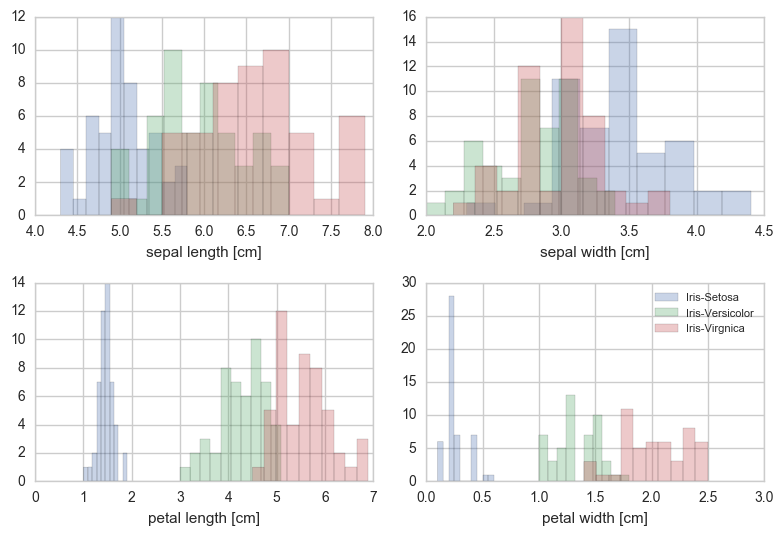

In [3]:
label_dict = {0: 'Iris-Setosa',
              1: 'Iris-Versicolor',
              2: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

for cnt in range(4):
    plt.subplot(2, 2, cnt+1)
    for target, label in label_dict.items():
        plt.hist(X[y==target, cnt], label=label, bins=10, alpha=0.3,)
    plt.xlabel(feature_dict[cnt])

plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

In [4]:
model = PCA(n_components=4)
model.fit(X)
print(model.components)

Explained variance ratio: [ 0.72770452  0.23030523  0.03683832  0.00515193]
[[ 0.52237162 -0.37231836  0.72101681  0.26199559]
 [-0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577 -0.6338014   0.52354627]]


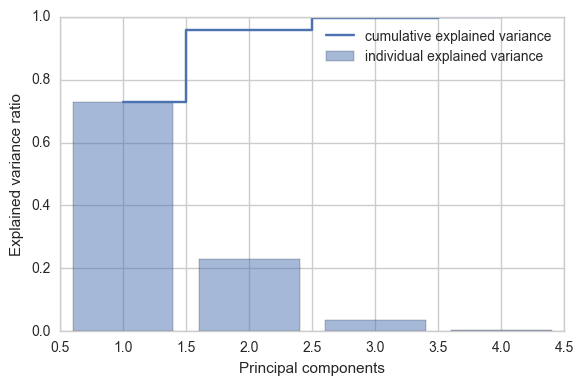

In [5]:
# plot the variance explained ratios

variance_ratio = model.variance_ratio
cum_variance_ratio = np.cumsum(variance_ratio)

plt.figure(figsize=(6, 4))
plt.bar(range(1, 5), variance_ratio, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 5), cum_variance_ratio, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [6]:
# reduce to 2-dimensional subspace
model = PCA(n_components=2)
y_projected = model.fit(X).transform(X)

Explained variance ratio: [ 0.72770452  0.23030523]


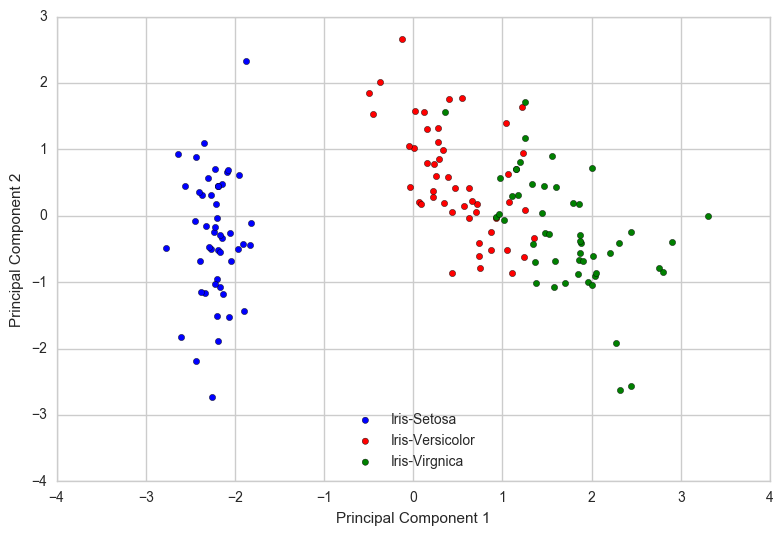

In [7]:
for target, color in zip((0, 1, 2), ('blue', 'red', 'green')):
    plt.scatter(y_projected[y==target, 0],
                y_projected[y==target, 1],
                label=label_dict[target],
                c=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()